<a href="https://colab.research.google.com/github/vitorlavor/Project2/blob/main/ProjectBankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT - Bank Marketing**



Problem description

---

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Market:**

**Product:** Bank term deposit

**Goal:** The object of this model is to predict which users are likely to subsctride the product, so that the company can direct campaigns for long-term deposit subscriptions by reducing the number of contacts.

---

Through a good exploratory data analysis, this project aimed to analyze such model aiming to increase the campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time)

Citation Request:

"This dataset is public available for research. The details are described in [Moro et al., 2011].  Please include this citation if you plan to use this database:

[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

Available at: [handle.net](http://hdl.handle.net/1822/14838), [dsi.uminho](http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt).

The dataset is also available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) .

## 1.0. Libraries

In [28]:
import pandas as pd # for data manipulation using dataframes
import numpy as np # for data statistical analysis

import matplotlib # for data visualisation
import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns # for fancy data visualization

from scipy.stats import zscore #

# for machine learning models and tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, roc_auc_score

%matplotlib inline

## 2.0. Dataset

In [29]:
# Upload from URL

url = 'https://raw.githubusercontent.com/vitorlavor/Project2/main/bank-full.csv'
dataset = pd.read_csv(url, delimiter = ';')

# Changing y name to better visualization

dataset = dataset.rename(columns = {'y': 'deposit'}, inplace = False)

## 3.0. Dataset Analysis

The objective is to understand the dataset, identify missing values and outliers.

### 3.1. Dataset Description

In [ ]:
 # Visualization of the first 10 lines

dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
print(f'Dataset: {dataset.shape[0]} instances (#rows), {dataset.shape[1]} features (#columns).')

Dataset: 45211 instances (#rows), 17 features (#columns).


In [ ]:
# Variable types and non-null counts

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Descritive analysis of numeric features

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


>  It is important to note that pdays and previous has -1 / 0 value until 75% of the data.

In [ ]:
# Print of unique values for the features

print('Age \n', np.sort(dataset['age'].unique()))
print('Jobs \n', dataset['job'].unique())
print('Marital Status \n', dataset['marital'].unique())
print('Education \n', dataset['education'].unique())
print('Default \n', dataset['default'].unique())
print('Balance \n', dataset['balance'].nunique())
print('Housing \n', dataset['housing'].unique())
print('Loan \n', dataset['loan'].unique())
print('Contact \n', dataset['contact'].unique())
print('Day of week \n', np.sort(dataset['day'].unique()))
print('Month \n', np.sort(dataset['month'].unique()))
print('Duration \n', dataset['duration'].nunique())
print('Campaign \n', np.sort(dataset['campaign'].unique()))
print('Pdays \n', dataset['pdays'].nunique())
print('Previous \n', np.sort(dataset['previous'].unique()))
print('Poutcome \n', dataset['poutcome'].unique())

Age 
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]
Jobs 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital Status 
 ['married' 'single' 'divorced']
Education 
 ['tertiary' 'secondary' 'unknown' 'primary']
Default 
 ['no' 'yes']
Balance 
 7168
Housing 
 ['yes' 'no']
Loan 
 ['no' 'yes']
Contact 
 ['unknown' 'cellular' 'telephone']
Day of week 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month 
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Duration 
 1573
Campaign 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 43 44 46 50 51 55 58 63]
Pda

### 3.2. Dataset Overview

**Instances** = 45.211

**Features:**

* Bank client data:
  1. *age* --- (numeric)
  2. *Job* --- (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
  3. *Marital Status* --- (categorical: "divorced", "married", "single","unknown"; note: "divorced" means divorced or widowed)
  4. Education --- (categorical: "unknown", "secondary", "primary", "tertiary")
  5. *Default* --- The client  has credit in default? (categorical: "no", "yes","unknown")
  6. *Balance* --- Average yearly balance, in euros (numeric)
  7. *Housing* --- The client has housing loan? (categorical: "no", "yes","unknown")
  8. *Loan* --- The client has personal loan? (categorical: "no", "yes","unknown")

* Related with the last contact of the current campaign:
   9. *Contact* --- Contact communication type (categorical: "cellular", "telephone") 
   10. *Day* --- Last contact day of the month (numeric)
   11. *Month* --- Last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   12. *Duration* --- Last contact duration, in seconds (numeric). 

* Other attributes:
  13. *Campaign* --- Number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14. *Pdays* --- Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  15. *Previous* --- Number of contacts performed before this campaign and for this client (numeric)
  16. *Poutcome* --- Outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")

*  Output variable (desired target):
  17. *deposit* --- Has the client subscribed a term deposit? (binary: "yes","no")

p.s. Duration attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### 3.2. Data Cleaning

#### 3.2.1. Duplicates

In [ ]:
print(dataset.duplicated().sum())

0


No duplicates

#### 3.2.2. Missing Data

There is no missing value in this dataset. Nevertheless, there are values like “unknown”, “others”, which are helpless just like missing values.

#### 3.2.3. Outliers

Outliers will be defined based on Standard Deviation Method, so values that are more than four standard deviations away from the mean will be discarded, consideraing it is a large dataset.

In [ ]:
dataset_out = dataset[['balance', 'age', 'campaign', 'duration', 'pdays', 'previous']]

In [ ]:
z_scores = zscore(dataset[['balance', 'age', 'campaign', 'duration', 'pdays', 'previous']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4).all(axis=1)
new_df = dataset[filtered_entries]

new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
# Descritive analysis of numeric features

new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43277.0,40.870070,10.518768,18.0,33.0,39.0,48.0,83.0
balance,43277.0,1156.291217,1937.041237,-8019.0,69.0,437.0,1376.0,13501.0
day,43277.0,15.735148,8.298862,1.0,8.0,16.0,21.0,31.0
duration,43277.0,246.267324,213.832410,0.0,104.0,180.0,314.0,1288.0
campaign,43277.0,2.531761,2.156248,1.0,1.0,2.0,3.0,15.0
pdays,43277.0,37.318414,93.620400,-1.0,-1.0,-1.0,-1.0,440.0
previous,43277.0,0.455138,1.252893,0.0,0.0,0.0,0.0,9.0


In [ ]:
zscore(dataset[['balance', 'age', 'campaign', 'duration', 'pdays', 'previous']])


array([[ 0.25641925,  1.60696496, -0.56935064,  0.0110161 , -0.41145311,
        -0.25194037],
       [-0.43789469,  0.28852927, -0.56935064, -0.41612696, -0.41145311,
        -0.25194037],
       [-0.44676247, -0.74738448, -0.56935064, -0.70736086, -0.41145311,
        -0.25194037],
       ...,
       [ 1.42959305,  2.92540065,  0.72181052,  3.37379688,  1.43618859,
         1.05047333],
       [-0.22802402,  1.51279098,  0.39902023,  0.97014641, -0.41145311,
        -0.25194037],
       [ 0.52836436, -0.37068857, -0.24656035,  0.39932797,  1.4761376 ,
         4.52357654]])

In [ ]:
# balance

dataset_out['balance_out'] = zscore(dataset_out['balance'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
out_index = []

out_index.append(list(dataset_out[dataset_out['balance_out'] > 4].index))
out_index.append(list(dataset_out[dataset_out['balance_out'] < -4].index))

428 Outliers for balance

In [ ]:
# age

dataset_out['age_out'] = zscore(dataset_out['age'])

out_index.append(list(dataset_out[dataset_out['age_out'] > 4].index))
out_index.append(list(dataset_out[dataset_out['age_out'] < -4].index))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


41 outliers for age

In [ ]:
# Campaign

dataset_out['campaign_out'] = zscore(dataset_out['campaign'])

out_index.append(list(dataset_out[dataset_out['campaign_out'] > 4].index))
out_index.append(list(dataset_out[dataset_out['campaign_out'] < -4].index))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No outliers for campaign

In [ ]:
# Duration

dataset_out['duration_out'] = zscore(dataset_out['duration'])

out_index.append(list(dataset_out[dataset_out['duration_out'] > 4].index))
out_index.append(list(dataset_out[dataset_out['duration_out'] < -4].index))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
len(out_index[4])

530

In [ ]:
dataset_out

,balance,age,campaign,duration,pdays,previous,balance_out,age_out,campaign_out,duration_out
0,2143,58,1,261,-1,0,0.256419,1.606965,-0.569351,0.011016
1,29,44,1,151,-1,0,-0.437895,0.288529,-0.569351,-0.416127
2,2,33,1,76,-1,0,-0.446762,-0.747384,-0.569351,-0.707361
3,1506,47,1,92,-1,0,0.047205,0.571051,-0.569351,-0.645231
4,1,33,1,198,-1,0,-0.447091,-0.747384,-0.569351,-0.233620
...,...,...,...,...,...,...,...,...,...,...
45206,825,51,3,977,-1,0,-0.176460,0.947747,0.076230,2.791329
45207,1729,71,2,456,-1,0,0.120447,2.831227,-0.246560,0.768224
45208,5715,72,5,1127,184,3,1.429593,2.925401,0.721811,3.373797
45209,668,57,4,508,-1,0,-0.228024,1.512791,0.399020,0.970146


No outliers for duration

## 4.0. Feature Analysis

### 4.1. Target Response

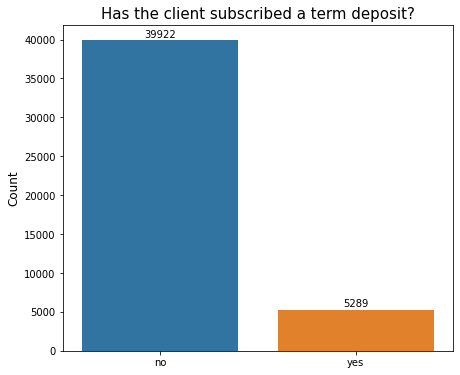

In [30]:
plt.figure(figsize = (7, 6))

ax = sns.countplot(x = dataset['deposit'])

for p in ax.patches:
  ax.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

ax = plt.title('Has the client subscribed a term deposit?', fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.show()

<Figure size 504x432 with 0 Axes>

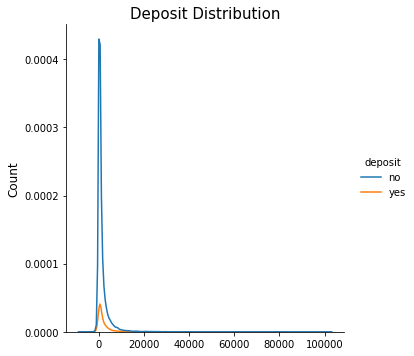

In [31]:
plt.figure(figsize = (7, 6))

sns.displot(data = dataset, x = 'balance', hue = 'deposit', kind="kde")
plt.title('Deposit Distribution', fontsize = 15)
plt.xlabel("", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.show()

**Some Conclusions**

> É possível perceber que a classe de resposta é desbalanceada, visto que apenas 11,7% das pessoas contactadas aceitaram o depósito. Além disso, a grande maioria possuem balance próximos de 0.

### 4.2. Numeric Features

In [32]:
# Transforming month into numerical feature

months_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9,
               'oct': 10, 'nov': 11, 'dec': 12}
dataset['month'] = dataset['month'].map(months_dict)

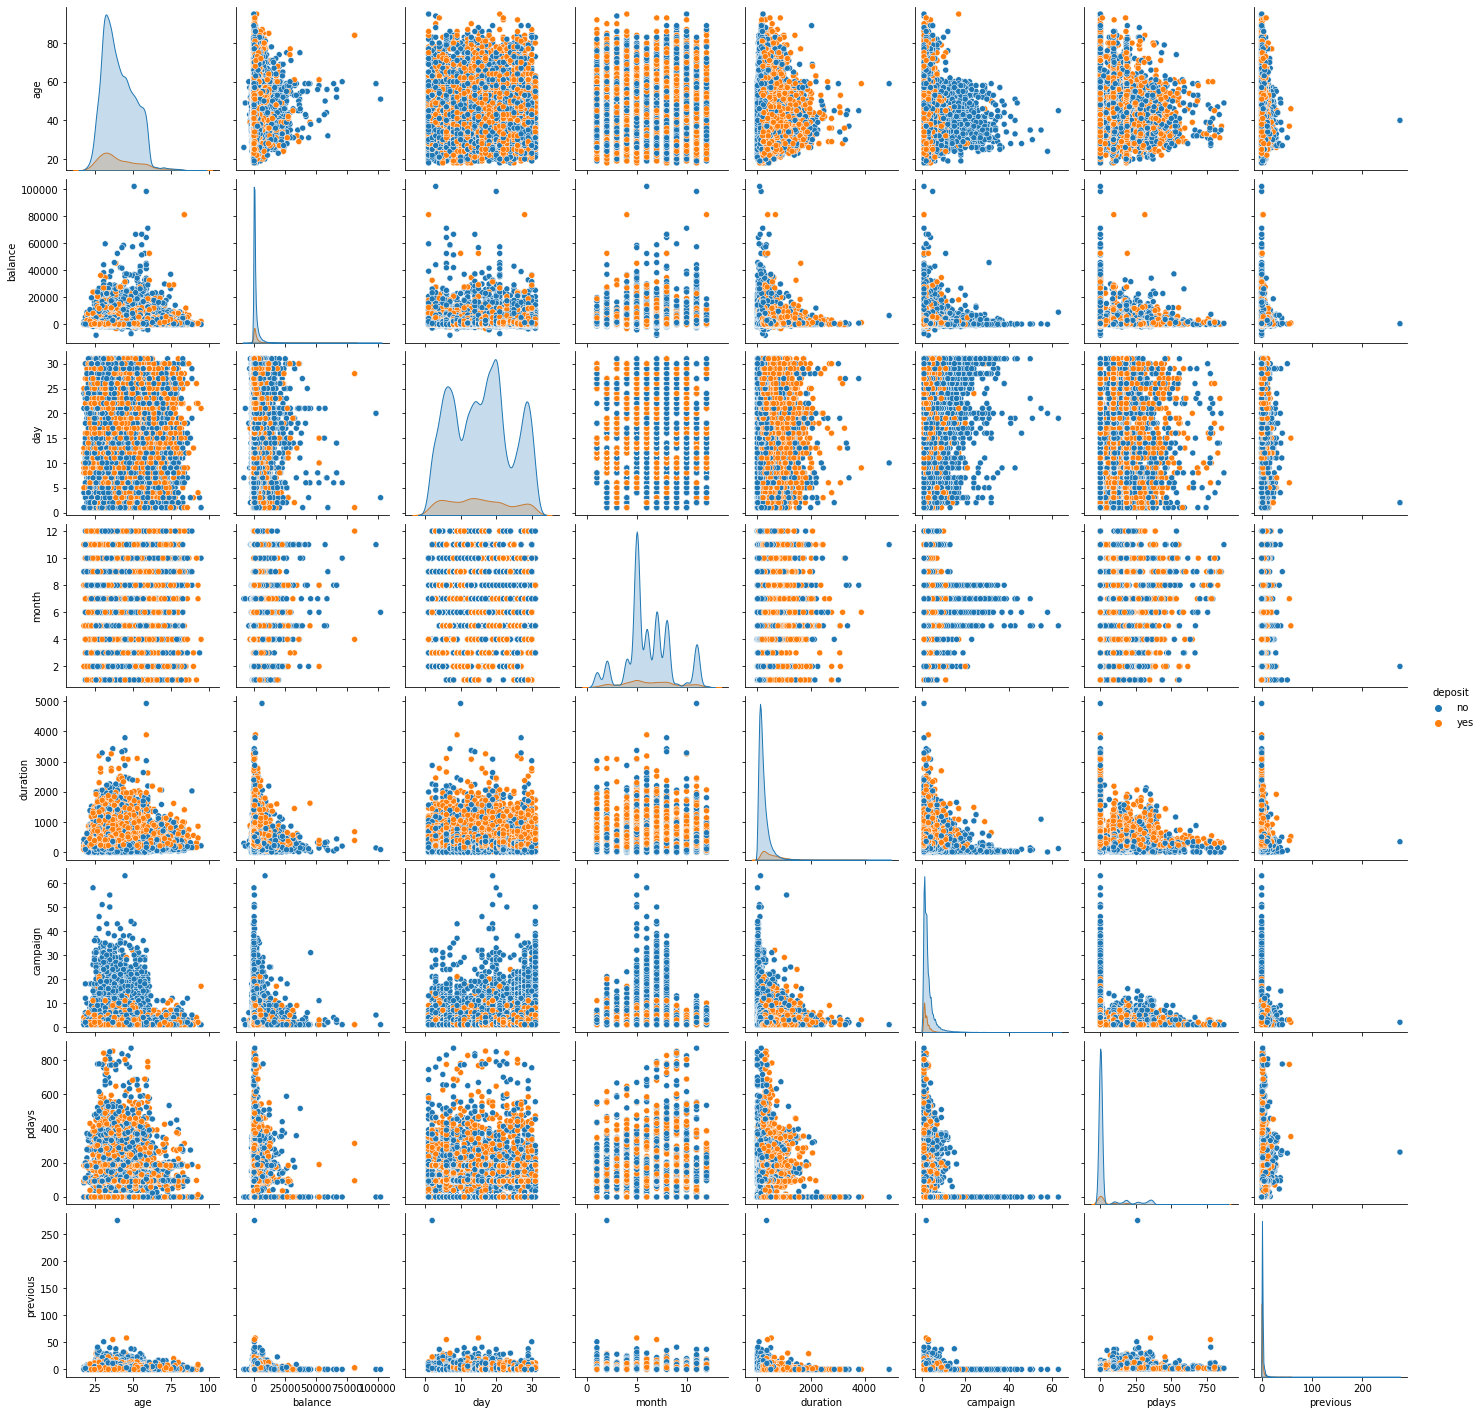

In [34]:
# Pairplot analysis

var = ['deposit','age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

sns.pairplot(dataset[var], hue = 'deposit')

**Some Insights**:

> A distribuição das variáveis é muito semelhante para as respostas sim e não;

> A maior parte de pdays e previous é 0;

> Existe um valor de previous que provavelmente é um valor errado, pois é muito improvável que uma pessoa tenha sido contactada mais de 200 vezes;

> Quando analisamos a idade, a partir de 60 anos observamos que existem menos contato. Isso pode significar que as pessoas são mais decisivas se querem ou não o produto;

> Quando obsevamos o gráfico do mes, existem 3 picos dia dias que mais pessoas foram contactadas;

> Nitidamente, as pessoas mais contactadas tem apresentam menor probabilidade de aderirem o produto de campanha;

> As pessoas com menor balance são nitidamente mais contactadas, o que não resulta em aceitar a proposta;

> Outro ponto interessante, é o fato de quanto maior o balance menor fica a duração da ligação e menos produtos são aceitos, enquanto para um menor balance maior é maior a duração da ligação com uma maior probabilidade de aceitar a propostas.

### 4.3. Categorical Features

#### 4.3.1. Job

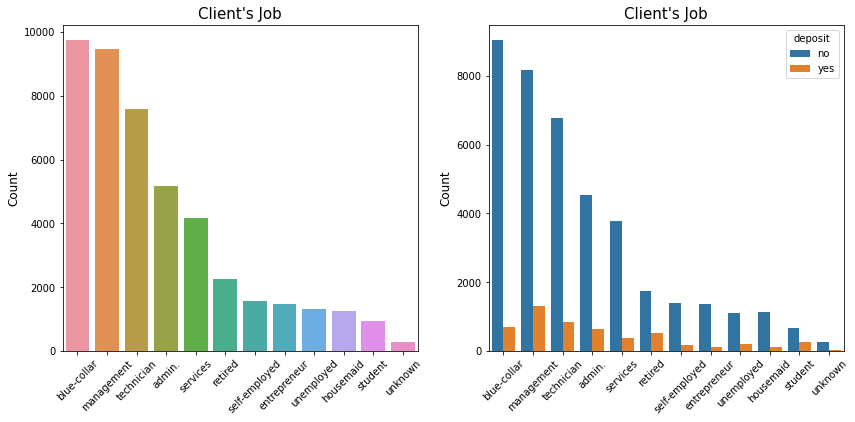

In [35]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(data = dataset, x = 'job', order = dataset['job'].value_counts().index)
ax = plt.title("Client's Job", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=45)

plt.subplot(122)
ax = sns.countplot(data = dataset, x = 'job', hue = 'deposit', order = dataset['job'].value_counts().index)
ax = plt.title("Client's Job", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=45)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [36]:
# Mediana da idade para cada categoria de emprego

dataset.groupby('job').median()[['age', 'balance']]

,age,balance
job,,
admin.,38.0,396.0
blue-collar,39.0,388.0
entrepreneur,41.0,352.0
housemaid,47.0,406.0
management,38.0,572.0
retired,59.0,787.0
self-employed,39.0,526.0
services,37.0,339.5
student,26.0,502.0


> Blue collar empregos compoem uma grande faixa de entrevistados com uma relativamente baixa taxa de sucesso! Apesar de não serem a maioria dos entrevistados, os estudantes e aposentados apresentaram maior taxa de aceitação.

#### 4.3.2. Marital Status

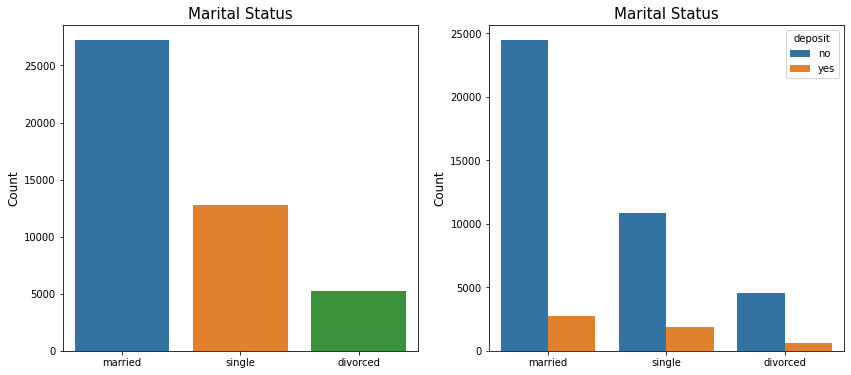

In [37]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(data = dataset, x = 'marital', order = dataset['marital'].value_counts().index)
ax = plt.title("Marital Status", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
ax = sns.countplot(data = dataset, x = 'marital', hue = 'deposit', order = dataset['marital'].value_counts().index)
ax = plt.title("Marital Status", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

> Aparentemente, a taxa de aceitação não tem muita relação com o status de casamento, pois observamos que ao cair a quantidade de entrevistados em cada categoria, também reduz a quantidade de aceitação. A caraterística não aparenta ter uma relação direta com o taxa de aceitação. pois o seu comportamento é muito parecido

#### 4.3.3. Education

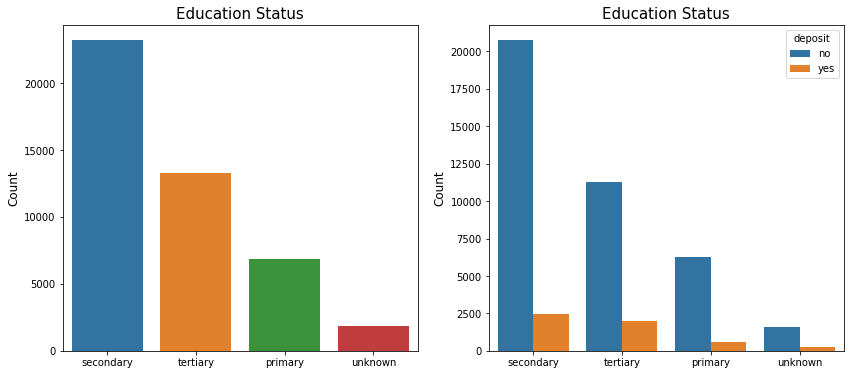

In [38]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(data = dataset, x = 'education', order = dataset['education'].value_counts().index)
ax = plt.title("Education Status", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
ax = sns.countplot(data = dataset, x = 'education', hue = 'deposit', order = dataset['education'].value_counts().index)
ax = plt.title("Education Status", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

> Da mesma forma que o marital status, a taxa de aceitação não tem muita relação o status da educação.

#### 4.3.4. Housing

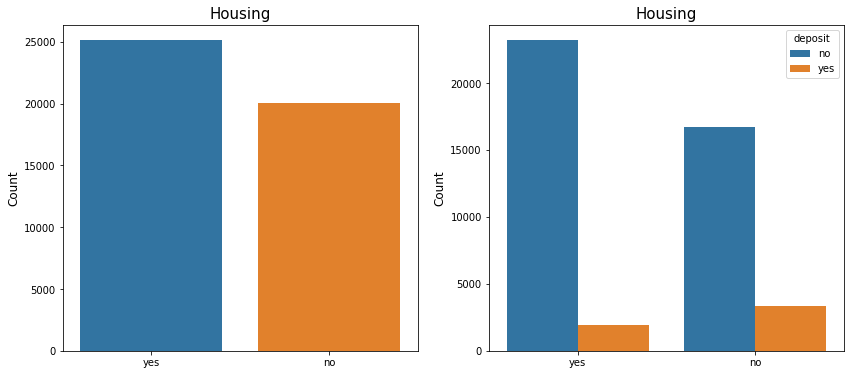

In [39]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(data = dataset, x = 'housing', order = ['yes', 'no'])
ax = plt.title("Housing", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
ax = sns.countplot(data = dataset, x = 'housing', hue = 'deposit', order = ['yes', 'no'])
ax = plt.title("Housing", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

> A taxa de sucesso entre os que não possuem emprestimos para casas é ligeiramente maior.

#### 4.3.5. Loan

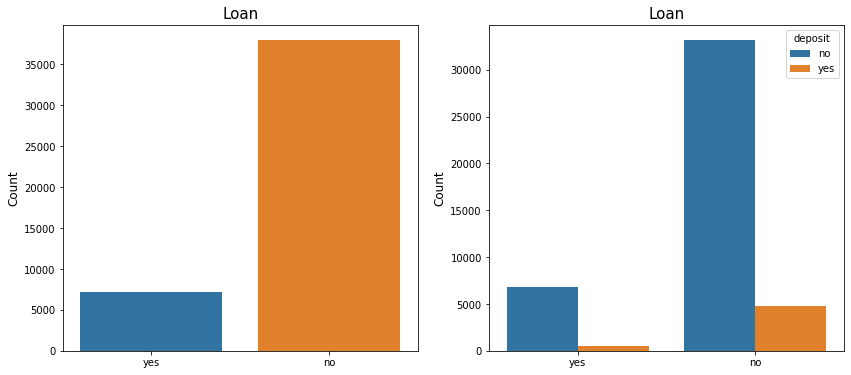

In [40]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(data = dataset, x = 'loan', order = ['yes', 'no'])
ax = plt.title("Loan", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
ax = sns.countplot(data = dataset, x = 'loan', hue = 'deposit', order = ['yes', 'no'])
ax = plt.title("Loan", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

> Diferentemente do emprestimo para casa, a maioria das pesoas não tem emprestimo pessoa, sendo que a taxa de sucesso entre os que não possuem emprestimos pessoais é ligeiramente maior.

#### 4.3.6. Contact

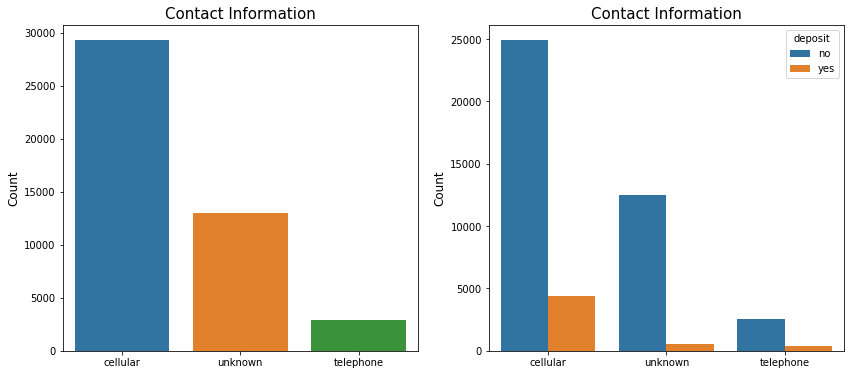

In [41]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(data = dataset, x = 'contact', order = dataset['contact'].value_counts().index)
ax = plt.title("Contact Information", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
ax = sns.countplot(data = dataset, x = 'contact', hue = 'deposit', order = dataset['contact'].value_counts().index)
ax = plt.title("Contact Information", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

> Uma grande parcela das pessoas não se sabem a forma de contat, o que pode impactar o o nosso resultado final.

#### 4.3.7. POutcome

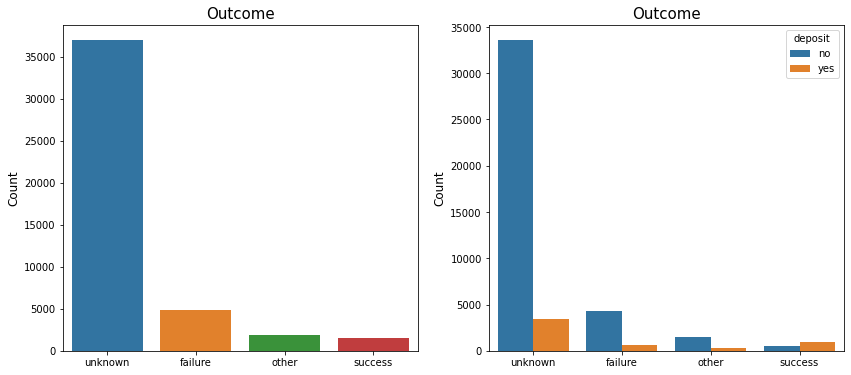

In [42]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(data = dataset, x = 'poutcome', order = dataset['poutcome'].value_counts().index)
ax = plt.title("Outcome", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
ax = sns.countplot(data = dataset, x = 'poutcome', hue = 'deposit', order = dataset['poutcome'].value_counts().index)
ax = plt.title("Outcome", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

Nitidamente, o sucesso em campanhas anteriores é um fator relevante para pessoas adiquirirem o produto em novas campanhas.

Como a variável other é similar a unknown, está será substituida por unknown

In [43]:
dataset['poutcome'] = dataset['poutcome'].replace(['other'], 'unknown')

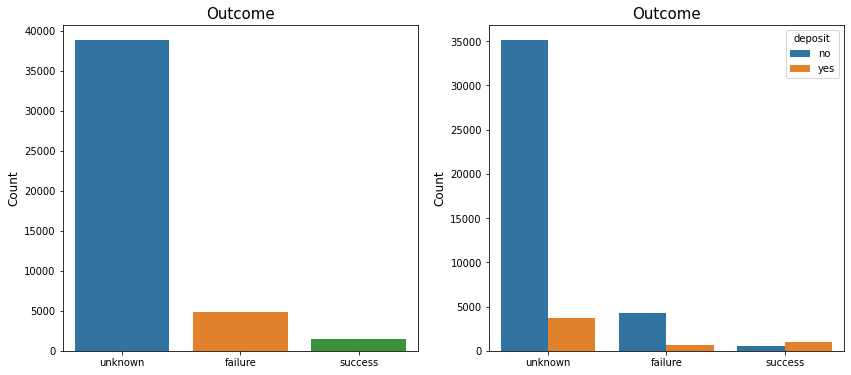

In [44]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(data = dataset, x = 'poutcome', order = dataset['poutcome'].value_counts().index)
ax = plt.title("Outcome", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
ax = sns.countplot(data = dataset, x = 'poutcome', hue = 'deposit', order = dataset['poutcome'].value_counts().index)
ax = plt.title("Outcome", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

## 5.0. Hyphotesis

This section aims to answer some formulated hypotheses. The mind map was prepared to visually organize the ideas.

**Hypotheses**

1. As pessoas mais velhas tem uma maior propensão a assinar novos produtos;
2. As pessoas que conversam por mais de 5 minutem tem uma maior proabilidade de assinar;
3. Os clientes com maior valor em conta corrente tem maior probabilidade de assinar;
4. Os aposentados tem maior tem maior probabilidade de assinar;
5. The subscription rate is related to the period of the year (day of the week, month, year or season).

### 5.1. As pessoas mais velhas tem uma maior propensão a assinar novos produtos


Categorize the ages by bins

In [45]:
a1 = dataset[(dataset['age'] < 30)]
a2 = dataset[(dataset['age'] >= 30) & (dataset['age'] < 40)]
a3 = dataset[(dataset['age'] >= 40) & (dataset['age'] < 50)]
a4 = dataset[(dataset['age'] >= 50) & (dataset['age'] < 60)]
a5 = dataset[(dataset['age'] >= 60)]

In [46]:
# Percentage for subscribers 

contacted = [(len(a1) / len (dataset) * 100), (len(a2) / len (dataset) * 100), (len(a3) / len (dataset) * 100),
             (len(a4) / len (dataset) * 100), (len(a5) / len (dataset) * 100)]
subscription = [(len(a1[a1['deposit'] == 'yes'])/len(a1) * 100), (len(a2[a2['deposit'] == 'yes'])/len(a2) * 100),
                (len(a3[a3['deposit'] == 'yes'])/len(a3) * 100), (len(a4[a4['deposit'] == 'yes'])/len(a4) * 100),
                (len(a5[a5['deposit'] == 'yes'])/len(a5) * 100)]


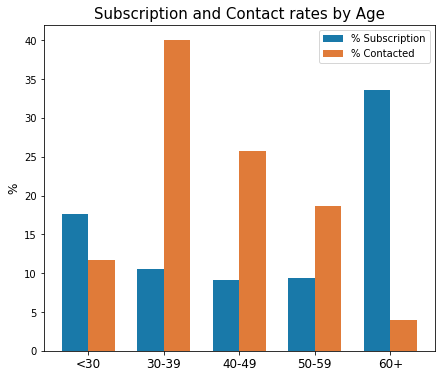

In [47]:
labels = ['<30', '30-39', '40-49', '50-59', '60+'] 

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7, 6))

ax.bar(x - width/2, subscription, width, label='% Subscription', color = '#1979a9')
ax.bar(x + width/2, contacted, width, label='% Contacted', color = '#e07b39')
#ax = plt.title('Has the client subscribed a term deposit?', fontsize = 15)
#ax = plt.xlabel("", fontsize = 12)
#ax = plt.ylabel("Count", fontsize = 12)
ax.set_ylabel('%', fontsize = 12)
ax.set_title('Subscription and Contact rates by Age', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12)
ax.legend(fontsize = 10)

plt.show()

> Apesar das classes de idade menor que 30 e 60+ terem a menor incidencia de pessoas contactadas pela campanha de marketing, estas classes possuem as maiores porcentagem de sucesso da campanha, ou seja, aparentemente essas duas classes podem ser interessante para direcionar novas campanhas de marketing

### 5.2. As pessoas que conversam por mais de 5 minutos tem uma maior proabilidade de assinar

In [48]:
# Transforming the feature for minutes

dataset['duration'] = dataset['duration']/60

In [49]:
dataset['duration'].describe().T

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [50]:
a1 = dataset[(dataset['duration'] <= 5)]
a2 = dataset[(dataset['duration'] > 5) & (dataset['duration'] <= 10)]
a3 = dataset[(dataset['duration'] > 10) & (dataset['duration'] <= 15)]
a4 = dataset[(dataset['duration'] > 15) & (dataset['duration'] <= 25)]
a5 = dataset[(dataset['duration'] > 25)]

In [51]:
contacted = [(len(a1) / len (dataset) * 100), (len(a2) / len (dataset) * 100), (len(a3) / len (dataset) * 100),
             (len(a4) / len (dataset) * 100), (len(a5) / len (dataset) * 100)]
subscription = [(len(a1[a1['deposit'] == 'yes'])/len(a1) * 100), (len(a2[a2['deposit'] == 'yes'])/len(a2) * 100),
                (len(a3[a3['deposit'] == 'yes'])/len(a3) * 100), (len(a4[a4['deposit'] == 'yes'])/len(a4) * 100),
                (len(a5[a5['deposit'] == 'yes'])/len(a5) * 100)]

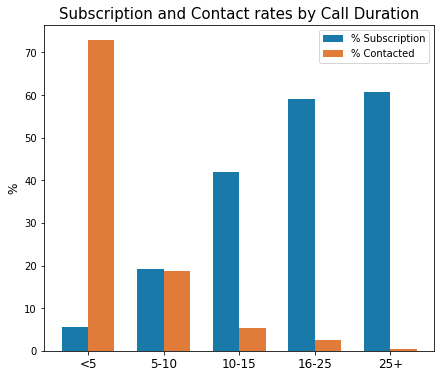

In [52]:
labels = ['<5', '5-10', '10-15', '16-25', '25+'] 

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7, 6))

ax.bar(x - width/2, subscription, width, label='% Subscription', color = '#1979a9')
ax.bar(x + width/2, contacted, width, label='% Contacted', color = '#e07b39')
#ax = plt.title('Has the client subscribed a term deposit?', fontsize = 15)
#ax = plt.xlabel("", fontsize = 12)
#ax = plt.ylabel("Count", fontsize = 12)
ax.set_ylabel('%', fontsize = 12)
ax.set_title('Subscription and Contact rates by Call Duration', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12)
ax.legend(fontsize = 10)

plt.show()

> É interessante notar a tendêmcia oposta, enquanto a proporção dos contactados diminui a medida que a duração de contato aumenta, a proporção de subscription aumenta com o aumento da duração do contato. 

### 5.3. Os clientes com maior valor em conta corrente tem maior probabilidade de assinar

In [53]:
dataset['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [54]:
a1 = dataset[(dataset['balance'] <= 0)]
a2 = dataset[(dataset['balance'] > 0) & (dataset['duration'] <= 1000)]
a3 = dataset[(dataset['balance'] > 1000) & (dataset['duration'] <= 5000)]
a4 = dataset[(dataset['balance'] > 5000)]

In [55]:
contacted = [(len(a1) / len (dataset) * 100), (len(a2) / len (dataset) * 100), (len(a3) / len (dataset) * 100),
             (len(a4) / len (dataset) * 100)]
subscription = [(len(a1[a1['deposit'] == 'yes'])/len(a1) * 100), (len(a2[a2['deposit'] == 'yes'])/len(a2) * 100),
                (len(a3[a3['deposit'] == 'yes'])/len(a3) * 100), (len(a4[a4['deposit'] == 'yes'])/len(a4) * 100)]

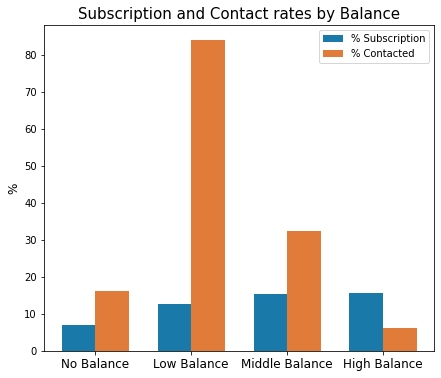

In [56]:
labels = ['No Balance', 'Low Balance', 'Middle Balance', 'High Balance']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7, 6))

ax.bar(x - width/2, subscription, width, label='% Subscription', color = '#1979a9')
ax.bar(x + width/2, contacted, width, label='% Contacted', color = '#e07b39')
#ax = plt.title('Has the client subscribed a term deposit?', fontsize = 15)
#ax = plt.xlabel("", fontsize = 12)
#ax = plt.ylabel("Count", fontsize = 12)
ax.set_ylabel('%', fontsize = 12)
ax.set_title('Subscription and Contact rates by Balance', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12)
ax.legend(fontsize = 10)

plt.show()

Focus - Middle and High Balance

### 5.4. Os aposentados tem maior tem maior probabilidade de assinar


In [57]:
labels = ['blue-collar', 'management', 'admin.', 'services', 'retired', 'self-employed', 'entrepreneur',
          'unemployed', 'housemaid', 'student', 'unknown']

contacted = []
subscription = []

for key, value in enumerate(labels):
  contacted.append(dataset['job'].value_counts(normalize = True)[key])
  a1 =  dataset['job'] == value
  subscription.append(dataset[a1]['deposit'].value_counts(normalize = True)[1])

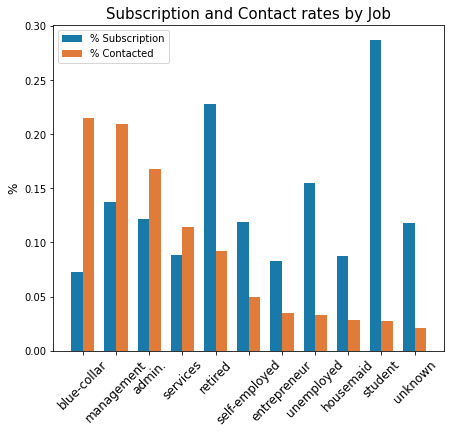

In [60]:
labels = ['blue-collar', 'management', 'admin.', 'services', 'retired', 'self-employed', 'entrepreneur',
          'unemployed', 'housemaid', 'student', 'unknown']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7, 6))

ax.bar(x - width/2, subscription, width, label='% Subscription', color = '#1979a9')
ax.bar(x + width/2, contacted, width, label='% Contacted', color = '#e07b39')
#ax = plt.title('Has the client subscribed a term deposit?', fontsize = 15)
#ax = plt.xlabel("", fontsize = 12)
#ax = plt.ylabel("Count", fontsize = 12)

ax.set_ylabel('%', fontsize = 12)
ax.set_title('Subscription and Contact rates by Job', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12)
ax.legend(fontsize = 10)
plt.xticks(rotation=45)

plt.show()

maiores taxas de subscrição são os aposentados e os estudantes!

In [61]:
dataset[dataset['job'] == 'management']['deposit'].value_counts(normalize = True)

no     0.862444
yes    0.137556
Name: deposit, dtype: float64

In [ ]:
contacted = [(len(a1) / len (dataset) * 100), (len(a2) / len (dataset) * 100), (len(a3) / len (dataset) * 100),
             (len(a4) / len (dataset) * 100)]

In [ ]:
a1 = dataset[dataset['job'] == 'blue-collar']

In [ ]:
len(a1)

9731

In [ ]:
(dataset[dataset['job'] == 'blue-collar']).sum() / len(dataset)*100

0.21525427478045436

In [ ]:
dataset['job'].value_counts(normalize = True)

blue-collar      0.215254
management       0.209171
technician       0.168027
admin.           0.114385
services         0.091888
retired          0.050081
self-employed    0.034928
entrepreneur     0.032893
unemployed       0.028823
housemaid        0.027429
student          0.020749
unknown          0.006371
Name: job, dtype: float64

In [ ]:
contacted = [(len(a1) / len (dataset) * 100), (len(a2) / len (dataset) * 100), (len(a3) / len (dataset) * 100),
             (len(a4) / len (dataset) * 100)]
subscription = [(len(a1[a1['deposit'] == 'yes'])/len(a1) * 100), (len(a2[a2['deposit'] == 'yes'])/len(a2) * 100),
                (len(a3[a3['deposit'] == 'yes'])/len(a3) * 100), (len(a4[a4['deposit'] == 'yes'])/len(a4) * 100)]

## 6.0. Classification Model

In [ ]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### 6.1. Logistic Regression

Começaremos a nossa modelagem, utilizando uma regressão logistica com as variáveis apenas dos clientes.

Para isso, temos que seguir os seguintes passos:


In [62]:
# Transforming yes/no answers into a binary response

dataset['default'] = (dataset['default'] == 'yes').astype(int)
dataset['housing'] = (dataset['housing'] == 'yes').astype(int)
dataset['loan'] = (dataset['loan'] == 'yes').astype(int)
dataset['deposit'] = (dataset['deposit'] == 'yes').astype(int)
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,4.350000,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,2.516667,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,1.266667,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,1.533333,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,3.300000,1,-1,0,unknown,0


In [63]:
# Transforming categorical features with dummies

dataset = pd.get_dummies(dataset, columns = ['job'])
dataset = pd.get_dummies(dataset, columns=['marital'])
dataset = pd.get_dummies(dataset, columns=['education'])
dataset = pd.get_dummies(dataset, columns=['contact'])
dataset = pd.get_dummies(dataset, columns=['poutcome'])

In [64]:
dataset

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,4.350000,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
1,44,0,29,1,0,5,5,2.516667,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,1.266667,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,1.533333,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
4,33,0,1,0,0,5,5,3.300000,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,16.283333,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
45207,71,0,1729,0,0,17,11,7.600000,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
45208,72,0,5715,0,0,17,11,18.783333,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
45209,57,0,668,0,0,17,11,8.466667,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [65]:
# Removing one dummy for each category - the other categories profive sufficient information

dataset = dataset.drop(columns = ['job_unknown', 'marital_single', 'education_unknown', 'contact_unknown', 'poutcome_unknown'])
dataset

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_success
0,58,0,2143,1,0,5,5,4.350000,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,44,0,29,1,0,5,5,2.516667,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,33,0,2,1,1,5,5,1.266667,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,47,0,1506,1,0,5,5,1.533333,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,33,0,1,0,0,5,5,3.300000,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,16.283333,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
45207,71,0,1729,0,0,17,11,7.600000,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
45208,72,0,5715,0,0,17,11,18.783333,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1
45209,57,0,668,0,0,17,11,8.466667,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [66]:
# Scaler

scaler_cats = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays']

scaler = StandardScaler()

for var in scaler_cats:
  dataset[var] = scaler.fit_transform(np.array(dataset[var]).reshape(-1,1))

dataset.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_success
0,1.606965,0,0.256419,1,0,-1.298476,-0.475354,0.011016,-0.569351,-0.411453,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0.288529,0,-0.437895,1,0,-1.298476,-0.475354,-0.416127,-0.569351,-0.411453,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,-0.747384,0,-0.446762,1,1,-1.298476,-0.475354,-0.707361,-0.569351,-0.411453,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0.571051,0,0.047205,1,0,-1.298476,-0.475354,-0.645231,-0.569351,-0.411453,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.747384,0,-0.447091,0,0,-1.298476,-0.475354,-0.233620,-0.569351,-0.411453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# Features for client

classification_target = 'deposit'
features = ['age', 'default',	'balance', 'housing', 'loan', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 
            'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
            'education_primary', 'education_secondary', 'education_tertiary']

In [ ]:
dataset[features]

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary
0,1.606896,0,0.256387,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,0.288500,0,-0.437899,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.747382,0,-0.446766,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.571014,0,0.047181,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.747382,0,-0.447095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947698,0,-0.176474,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
45207,2.831120,0,0.120420,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
45208,2.925291,0,1.429512,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
45209,1.512725,0,-0.228037,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


https://www.analyticsvidhya.com/blog/2016/09/this-machine-learning-project-on-imbalanced-data-can-add-value-to-your-resume/

In [68]:
# Train/Test Split
train, test = train_test_split(dataset, test_size = 0.2, stratify = dataset['deposit'], random_state = 1) # 80% Train | 20% Test # stratified sampled

X_train = train[features]
y_train = train[classification_target]

X_test = test[features]
y_test = test[classification_target]

In [69]:
# Instantiate the model

logistic_regression = LogisticRegression(random_state = 1)

In [70]:
# Fit the model

estimator_lr = logistic_regression.fit(X_train, y_train)

In [71]:
# Prediction

predictions_lr_train = estimator_lr.predict(X_train)
predictions_lr_test = estimator_lr.predict(X_test)

In [72]:
# Scores:

acc_train = accuracy_score(y_train, predictions_lr_train).round(3)
acc_test = accuracy_score(y_test, predictions_lr_test).round(3)

f1_train = f1_score(y_train, predictions_lr_train).round(3)
f1_test = f1_score(y_test, predictions_lr_test).round(3)

rec_train = recall_score(y_train, predictions_lr_train).round(3)
rec_test = recall_score(y_test, predictions_lr_test).round(3)

cv = float(format(cross_val_score(logistic_regression, dataset[features], dataset['deposit'], cv=10, scoring = 'accuracy').mean(),'.3f'))


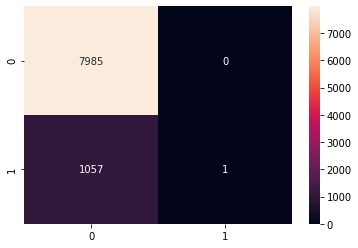

In [73]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_lr_test)
sns.heatmap(cm, annot=True, fmt='d')

roc_auc_score for Logistic Regression:  0.6781782477305628


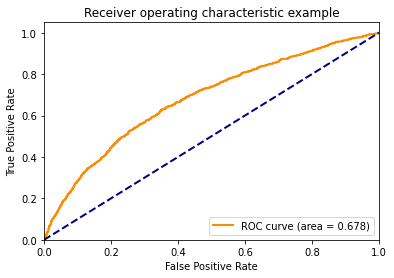

In [74]:
# ROC and AUC

y_score = logistic_regression.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

auc = roc_auc_score(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.figure()
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [75]:
# Table to evaluate the models

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],                           
                           'Accuracy (train)':[],
                           'Accurracy (test)':[],
                           'F1 (train)':[],
                           'F1 (test)':[],
                           'Recall (train)': [],
                           'Recall (test)': [],
                           '5-Fold Cross Validation':[],
                           'AUC': []})

r = evaluation.shape[0]
evaluation.loc[r] = ['Logistic Regression', '-', acc_train, acc_test, f1_train, f1_test, rec_train, rec_test, cv, auc.round(3)]
evaluation

,Model,Details,Accuracy (train),Accurracy (test),F1 (train),F1 (test),Recall (train),Recall (test),5-Fold Cross Validation,AUC
0,Logistic Regression,-,0.883,0.883,0.0,0.002,0.0,0.001,0.883,0.678


Claramento a predição não é sufuciente, visto que as classes respostas são muito desbalanceadas. A predição do treino e do teste são iguais pois nas dois conjuntos de dados possuem exatamente a mesma proporção de 1 e 0, pois foi identificado dessa forma na estratificação.

### 6.2. Weighted Logistic Regression

É muito importante criar artificios para lidar com classes desbalanceadas, como por exemplo redzir a amostraagem dos dados que existem em maior proporçã.

A opção utilizada para realizar comparação é ativar os pesos das classes na regressão logistica

In [76]:
# Features for client

classification_target = 'deposit'
features = ['age', 'default',	'balance', 'housing', 'loan', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 
            'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
            'education_primary', 'education_secondary', 'education_tertiary']

In [77]:
# Train/Test Split
train, test = train_test_split(dataset, test_size = 0.2, stratify = dataset['deposit'], random_state = 1) # 80% Train | 20% Test # stratified sampled

X_train = train[features]
y_train = train[classification_target]

X_test = test[features]
y_test = test[classification_target]

# define class weights
w = {0:10, 1:90}

# Instantiate the model
logistic_regression = LogisticRegression(random_state = 1, class_weight = w ) 

# Fit the model

estimator_lr = logistic_regression.fit(X_train, y_train)

# Prediction

predictions_lr_train = estimator_lr.predict(X_train)
predictions_lr_test = estimator_lr.predict(X_test)

# Scores:

acc_train = accuracy_score(y_train, predictions_lr_train).round(3)
acc_test = accuracy_score(y_test, predictions_lr_test).round(3)

f1_train = f1_score(y_train, predictions_lr_train).round(3)
f1_test = f1_score(y_test, predictions_lr_test).round(3)

rec_train = recall_score(y_train, predictions_lr_train).round(3)
rec_test = recall_score(y_test, predictions_lr_test).round(3)

cv = float(format(cross_val_score(logistic_regression, dataset[features], dataset['deposit'], cv=10, scoring = 'accuracy').mean(),'.3f'))

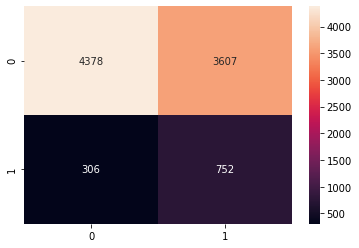

In [78]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_lr_test)
sns.heatmap(cm, annot=True, fmt='d')

roc_auc_score for Logistic Regression:  0.678438778759323


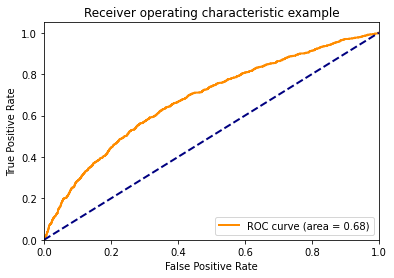

In [79]:
# ROC and AUC

y_score = logistic_regression.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

auc = roc_auc_score(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.figure()
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [80]:
# Increment the evaluation table

r = evaluation.shape[0]
evaluation.loc[r] = ['Weighted Logistic Regression', '-', acc_train, acc_test, f1_train, f1_test, rec_train, rec_test, cv, auc.round(3)]
evaluation.sort_values(by = 'AUC', ascending=False)

,Model,Details,Accuracy (train),Accurracy (test),F1 (train),F1 (test),Recall (train),Recall (test),5-Fold Cross Validation,AUC
0,Logistic Regression,-,0.883,0.883,0.000,0.002,0.000,0.001,0.883,0.678
1,Weighted Logistic Regression,-,0.556,0.567,0.268,0.278,0.694,0.711,0.531,0.678


In [ ]:
# ALL FEATURES

In [84]:
# Features for client

classification_target = 'deposit'
features = ['age', 'default',	'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign','pdays', 'previous', 'job_admin.', 
            'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 
            'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'education_primary', 'education_secondary', 
            'education_tertiary', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_success']

In [85]:
# Train/Test Split
train, test = train_test_split(dataset, test_size = 0.2, stratify = dataset['deposit'], random_state = 1) # 80% Train | 20% Test # stratified sampled

X_train = train[features]
y_train = train[classification_target]

X_test = test[features]
y_test = test[classification_target]

# define class weights
w = {0:10, 1:90}

# Instantiate the model
logistic_regression = LogisticRegression(max_iter = 1000,random_state = 1, class_weight = w ) 

# Fit the model

estimator_lr = logistic_regression.fit(X_train, y_train)

# Prediction

predictions_lr_train = estimator_lr.predict(X_train)
predictions_lr_test = estimator_lr.predict(X_test)

# Scores:

acc_train = accuracy_score(y_train, predictions_lr_train).round(3)
acc_test = accuracy_score(y_test, predictions_lr_test).round(3)

f1_train = f1_score(y_train, predictions_lr_train).round(3)
f1_test = f1_score(y_test, predictions_lr_test).round(3)

rec_train = recall_score(y_train, predictions_lr_train).round(3)
rec_test = recall_score(y_test, predictions_lr_test).round(3)

cv = float(format(cross_val_score(logistic_regression, dataset[features], dataset['deposit'], cv=10, scoring = 'accuracy').mean(),'.3f'))

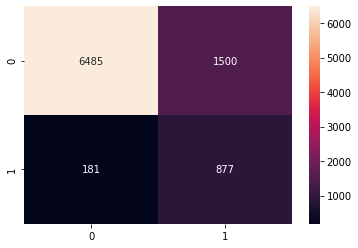

In [86]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_lr_test)
sns.heatmap(cm, annot=True, fmt='d')

roc_auc_score for Logistic Regression:  0.8937667862592077


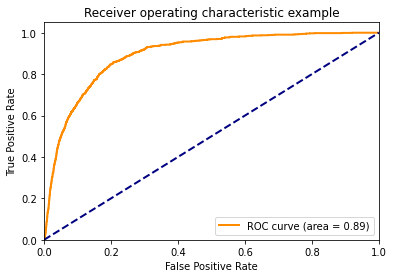

In [87]:
# ROC and AUC

y_score = logistic_regression.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

auc = roc_auc_score(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.figure()
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [88]:
# Increment the evaluation table

r = evaluation.shape[0]
evaluation.loc[r] = ['Weighted Logistic Regression', 'All Features', acc_train, acc_test, f1_train, f1_test, rec_train, rec_test, cv, auc.round(3)]
evaluation.sort_values(by = 'AUC', ascending=False)

,Model,Details,Accuracy (train),Accurracy (test),F1 (train),F1 (test),Recall (train),Recall (test),5-Fold Cross Validation,AUC
2,Weighted Logistic Regression,All Features,0.812,0.814,0.507,0.511,0.829,0.829,0.772,0.894
0,Logistic Regression,-,0.883,0.883,0.000,0.002,0.000,0.001,0.883,0.678
1,Weighted Logistic Regression,-,0.556,0.567,0.268,0.278,0.694,0.711,0.531,0.678


### 6.3. Decision Tree Classifier

In [89]:
# Features for client

classification_target = 'deposit'
features = ['age', 'default',	'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign','pdays', 'previous', 'job_admin.', 
            'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 
            'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'education_primary', 'education_secondary', 
            'education_tertiary', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_success']

In [90]:
# Train/Test Split
train, test = train_test_split(dataset, test_size = 0.2, stratify = dataset['deposit'], random_state = 1) # 80% Train | 20% Test # stratified sampled

X_train = train[features]
y_train = train[classification_target]

X_test = test[features]
y_test = test[classification_target]

# define class weights
w = {0:10, 1:90}

# Instantiate the model
tree_classifier = DecisionTreeClassifier(random_state = 1, class_weight = w) 

# Fit the model

estimator_lr = tree_classifier.fit(X_train, y_train)

# Prediction

predictions_lr_train = estimator_lr.predict(X_train)
predictions_lr_test = estimator_lr.predict(X_test)

# Scores:

acc_train = accuracy_score(y_train, predictions_lr_train).round(3)
acc_test = accuracy_score(y_test, predictions_lr_test).round(3)

f1_train = f1_score(y_train, predictions_lr_train).round(3)
f1_test = f1_score(y_test, predictions_lr_test).round(3)

rec_train = recall_score(y_train, predictions_lr_train).round(3)
rec_test = recall_score(y_test, predictions_lr_test).round(3)

cv = float(format(cross_val_score(tree_classifier, dataset[features], dataset['deposit'], cv=10, scoring = 'accuracy').mean(),'.3f'))

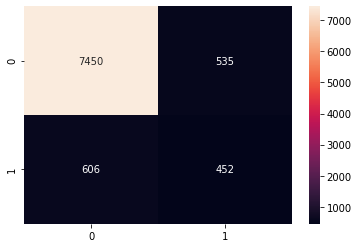

In [91]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_lr_test)
sns.heatmap(cm, annot=True, fmt='d')

roc_auc_score for Logistic Regression:  0.6801102729243039


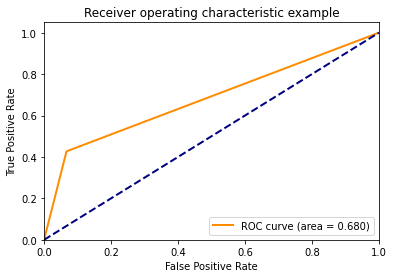

In [92]:
# ROC and AUC

y_score = tree_classifier.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

auc = roc_auc_score(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.figure()
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [93]:
# Increment the evaluation table

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree', 'All Features', acc_train, acc_test, f1_train, f1_test, rec_train, rec_test, cv, auc.round(3)]
evaluation.sort_values(by = 'AUC', ascending=False)

,Model,Details,Accuracy (train),Accurracy (test),F1 (train),F1 (test),Recall (train),Recall (test),5-Fold Cross Validation,AUC
2,Weighted Logistic Regression,All Features,0.812,0.814,0.507,0.511,0.829,0.829,0.772,0.894
3,Decision Tree,All Features,1.000,0.874,1.000,0.442,1.000,0.427,0.669,0.680
0,Logistic Regression,-,0.883,0.883,0.000,0.002,0.000,0.001,0.883,0.678
1,Weighted Logistic Regression,-,0.556,0.567,0.268,0.278,0.694,0.711,0.531,0.678


### 6.4. K-Neighbors Classifier

In [94]:
# Features for client

classification_target = 'deposit'
features = ['age', 'default',	'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign','pdays', 'previous', 'job_admin.', 
            'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 
            'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'education_primary', 'education_secondary', 
            'education_tertiary', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_success']

In [95]:
# Train/Test Split
train, test = train_test_split(dataset, test_size = 0.2, stratify = dataset['deposit'], random_state = 1) # 80% Train | 20% Test # stratified sampled

X_train = train[features]
y_train = train[classification_target]

X_test = test[features]
y_test = test[classification_target]

# define class weights
w = {0:10, 1:90}

# Instantiate the model
knn_classifier = KNeighborsClassifier() 

# Fit the model

estimator_lr = knn_classifier.fit(X_train, y_train)

# Prediction

predictions_lr_train = estimator_lr.predict(X_train)
predictions_lr_test = estimator_lr.predict(X_test)

# Scores:

acc_train = accuracy_score(y_train, predictions_lr_train).round(3)
acc_test = accuracy_score(y_test, predictions_lr_test).round(3)

f1_train = f1_score(y_train, predictions_lr_train).round(3)
f1_test = f1_score(y_test, predictions_lr_test).round(3)

rec_train = recall_score(y_train, predictions_lr_train).round(3)
rec_test = recall_score(y_test, predictions_lr_test).round(3)

cv = float(format(cross_val_score(knn_classifier, dataset[features], dataset['deposit'], cv=10, scoring = 'accuracy').mean(),'.3f'))

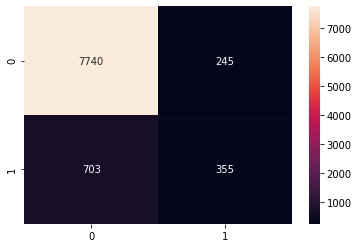

In [96]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_lr_test)
sns.heatmap(cm, annot=True, fmt='d')

roc_auc_score for Logistic Regression:  0.8319184089846797


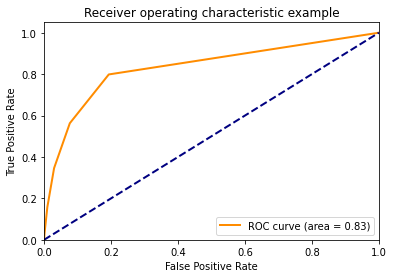

In [ ]:
# ROC and AUC

y_score = knn_classifier.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

auc = roc_auc_score(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.figure()
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Increment the evaluation table

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN', 'All Features', acc_train, acc_test, f1_train, f1_test, rec_train, rec_test, cv, auc.round(3)]
evaluation.sort_values(by = 'AUC', ascending=False)

,Model,Details,Accuracy (train),Accurracy (test),F1 (train),F1 (test),Recall (train),Recall (test),5-Fold Cross Validation,AUC
2,Weighted Logistic Regression,All Features,0.811,0.816,0.505,0.515,0.828,0.835,0.771,0.894
4,KNN,All Features,0.919,0.897,0.578,0.440,0.474,0.346,0.831,0.832
3,Decision Tree,All Features,1.000,0.875,1.000,0.447,1.000,0.431,0.670,0.683
0,Logistic Regression,-,0.883,0.883,0.001,0.000,0.000,0.000,0.883,0.681
1,Weighted Logistic Regression,-,0.559,0.572,0.269,0.278,0.693,0.707,0.531,0.681


### 6.5. Support Vector Classifier

In [ ]:
# Features for client

classification_target = 'deposit'
features = ['age', 'default',	'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign','pdays', 'previous', 'job_admin.', 
            'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 
            'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'education_primary', 'education_secondary', 
            'education_tertiary', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_other', 'poutcome_success']

In [ ]:
# Train/Test Split
train, test = train_test_split(dataset, test_size = 0.2, stratify = dataset['deposit'], random_state = 1) # 80% Train | 20% Test # stratified sampled

X_train = train[features]
y_train = train[classification_target]

X_test = test[features]
y_test = test[classification_target]

# define class weights
w = {0:10, 1:90}

# Instantiate the model
svc_classifier = SVC(probability = True, class_weight = w, random_state= 1)

# Fit the model

estimator_lr = svc_classifier.fit(X_train, y_train)

# Prediction

predictions_lr_train = estimator_lr.predict(X_train)
predictions_lr_test = estimator_lr.predict(X_test)

# Scores:

acc_train = accuracy_score(y_train, predictions_lr_train).round(3)
acc_test = accuracy_score(y_test, predictions_lr_test).round(3)

f1_train = f1_score(y_train, predictions_lr_train).round(3)
f1_test = f1_score(y_test, predictions_lr_test).round(3)

rec_train = recall_score(y_train, predictions_lr_train).round(3)
rec_test = recall_score(y_test, predictions_lr_test).round(3)

In [ ]:
cv = float(format(cross_val_score(svc_classifier, dataset[features], dataset['deposit'], cv=10, scoring = 'accuracy').mean(),'.3f'))

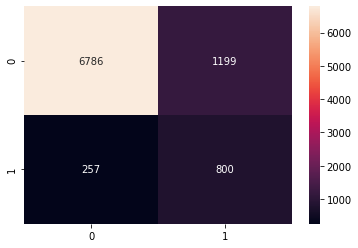

In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_lr_test)
sns.heatmap(cm, annot=True, fmt='d')

roc_auc_score for Logistic Regression:  0.8894197907737367


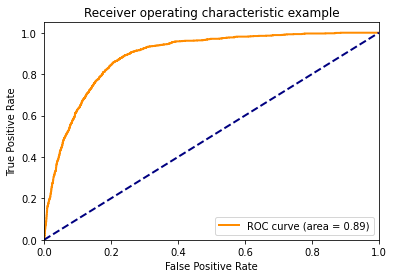

In [ ]:
# ROC and AUC

y_score = svc_classifier.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

auc = roc_auc_score(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.figure()
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Increment the evaluation table

r = evaluation.shape[0]
evaluation.loc[r] = ['SVM', 'All Features', acc_train, acc_test, f1_train, f1_test, rec_train, rec_test, cv, auc.round(3)]
evaluation.sort_values(by = 'AUC', ascending=False)

,Model,Details,Accuracy (train),Accurracy (test),F1 (train),F1 (test),Recall (train),Recall (test),5-Fold Cross Validation,AUC
2,Weighted Logistic Regression,All Features,0.811,0.816,0.505,0.515,0.828,0.835,0.771,0.894
5,SVM,All Features,0.885,0.839,0.662,0.524,0.962,0.757,0.831,0.889
4,KNN,All Features,0.919,0.897,0.578,0.440,0.474,0.346,0.831,0.832
3,Decision Tree,All Features,1.000,0.875,1.000,0.447,1.000,0.431,0.670,0.683
0,Logistic Regression,-,0.883,0.883,0.001,0.000,0.000,0.000,0.883,0.681
1,Weighted Logistic Regression,-,0.559,0.572,0.269,0.278,0.693,0.707,0.531,0.681


## 7.0. Marketing Insights and Recommendations